In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cdata = pd.read_csv("Madedata1.csv",low_memory=False)


In [3]:
cdata.head()

,Country,Age,Gender,fever,Bodypain,Runny_nose,Difficulty_in_breathing,Nasal_congestion,Sore_throat,Severity,Contact_with_covid_patient,Infected
0,China,10,Male,102,1,0,0,0,1,Mild,No,0
1,Italy,20,Male,103,1,1,0,0,0,Moderate,Not known,1
2,Iran,55,Transgender,99,0,0,0,1,1,Severe,No,0
3,Republic of Korean,37,Female,100,0,1,1,0,0,Mild,Yes,1
4,France,45,Male,101,1,1,1,1,0,Moderate,Yes,1


In [4]:
cdata.info()
#cdata = cdata.drop(["test_date"],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     2499 non-null   object
 1   Age                         2499 non-null   int64 
 2   Gender                      2499 non-null   object
 3   fever                       2499 non-null   int64 
 4   Bodypain                    2499 non-null   int64 
 5   Runny_nose                  2499 non-null   int64 
 6   Difficulty_in_breathing     2499 non-null   int64 
 7   Nasal_congestion            2499 non-null   int64 
 8   Sore_throat                 2499 non-null   int64 
 9   Severity                    2499 non-null   object
 10  Contact_with_covid_patient  2499 non-null   object
 11  Infected                    2499 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 234.4+ KB


In [5]:
cdata.shape

(2499, 12)

In [6]:
cdata['Infected'].value_counts()


1    1260
0    1239
Name: Infected, dtype: int64

In [7]:
pd.Series({col:cdata[col].unique() for col in cdata})


Country                       [China, Italy, Iran, Republic of Korean, Franc...
Age                           [10, 20, 55, 37, 45, 24, 40, 35, 60, 30, 18, 3...
Gender                                              [Male, Transgender, Female]
fever                                         [102, 103, 99, 100, 101, 98, 104]
Bodypain                                                                 [1, 0]
Runny_nose                                                               [0, 1]
Difficulty_in_breathing                                                  [0, 1]
Nasal_congestion                                                         [0, 1]
Sore_throat                                                              [1, 0]
Severity                                               [Mild, Moderate, Severe]
Contact_with_covid_patient                            [No, Not known, Yes, yes]
Infected                                                                 [0, 1]
dtype: object

<AxesSubplot:xlabel='Contact_with_covid_patient', ylabel='count'>

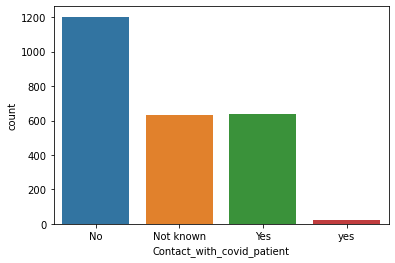

In [8]:
sns.countplot(x="Contact_with_covid_patient", data = cdata)

<AxesSubplot:xlabel='Contact_with_covid_patient', ylabel='count'>

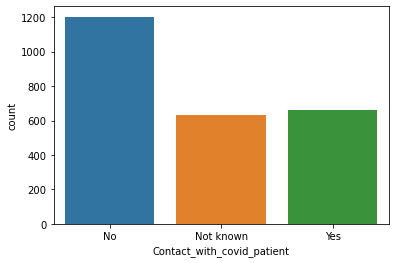

In [9]:
cdata=cdata.replace({"Contact_with_covid_patient": "yes"}, {"Contact_with_covid_patient": 'Yes'}, regex=True)
sns.countplot(x="Contact_with_covid_patient" ,data = cdata)

In [10]:
symptoms_g = ["Fever","Cough","Tiredness" ,"loss  taste smell","Shortness  breath" ,"difficulty breathing","Muscle aches","pneumonia",
"Chills","Sore throat","Runny nose","head ache","Chest pain","conjunctivitis","Nausea","Vomiting","Diarrhea","Rash","nasal congestion","bodypain"]
basic_info =["gender","country","age"]
cdata.columns = [i.lower() for i in cdata.columns ]
def filter(a):
    a = [i.lower() for i in a]
    a = [i.replace(" ",",") for i in a]
    a= [i.split(',') for i in a]
    b=[i for i in cdata.columns]
    b = [i.lower() for i in b]
    m=[]
    for y in b:
        for i in a:
            for c in i:
                if (c in y) and c!="":
                    m.append(c)
    final = list(set(y for y in b for i in m if i in y))
    return final

symptoms= filter(symptoms_g)
basic =filter(basic_info)
print("symptoms: ",symptoms)
print("basic info: ",basic)
u = basic + symptoms
other_factors = [y for y in cdata.columns  if y not in u  ]
print("other factors: ",other_factors)

symptoms:  ['nasal_congestion', 'fever', 'bodypain', 'runny_nose', 'sore_throat', 'difficulty_in_breathing']
basic info:  ['age', 'country', 'gender']
other factors:  ['severity', 'contact_with_covid_patient', 'infected']


In [12]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
cdata = cdata.apply(label_encoder.fit_transform)
 
cdata.head(10)

,country,age,gender,fever,bodypain,runny_nose,difficulty_in_breathing,nasal_congestion,sore_throat,severity,contact_with_covid_patient,infected
0,16,0,1,4,1,0,0,0,1,0,0,0
1,41,3,1,5,1,1,0,0,0,1,1,1
2,37,16,2,1,0,0,0,1,1,2,0,0
3,69,11,0,2,0,1,1,0,0,0,2,1
4,27,14,1,3,1,1,1,1,0,1,2,1
5,79,14,0,1,1,0,0,0,1,0,1,1
6,30,6,0,0,0,0,0,0,1,0,0,0
7,89,11,1,1,0,0,1,1,1,1,1,1
8,71,13,1,3,0,1,1,1,0,1,2,1
9,14,11,0,2,0,1,0,0,0,0,0,0


<AxesSubplot:>

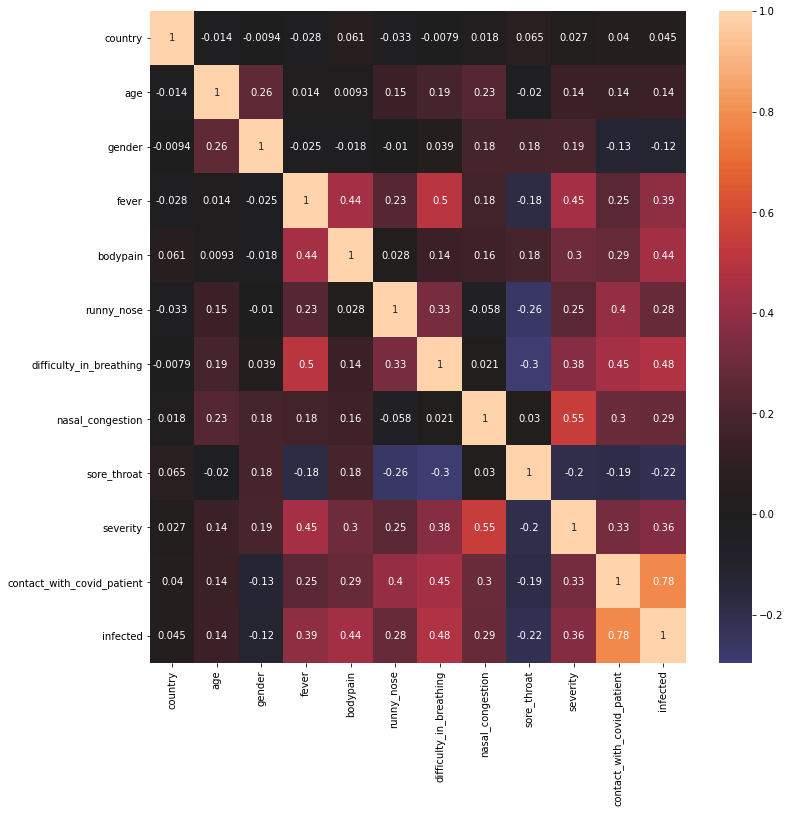

In [13]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cdata.corr(),annot =True,ax=ax,center = 0)

In [23]:
corr=cdata.corr().style.background_gradient().set_precision(2)

corr

,country,age,gender,fever,bodypain,runny_nose,difficulty_in_breathing,nasal_congestion,sore_throat,severity,contact_with_covid_patient,infected
country,1.00,-0.01,-0.01,-0.03,0.06,-0.03,-0.01,0.02,0.06,0.03,0.04,0.04
age,-0.01,1.00,0.26,0.01,0.01,0.15,0.19,0.23,-0.02,0.14,0.14,0.14
gender,-0.01,0.26,1.00,-0.03,-0.02,-0.01,0.04,0.18,0.18,0.19,-0.13,-0.12
fever,-0.03,0.01,-0.03,1.00,0.44,0.23,0.50,0.18,-0.18,0.45,0.25,0.39
bodypain,0.06,0.01,-0.02,0.44,1.00,0.03,0.14,0.16,0.18,0.30,0.29,0.44
runny_nose,-0.03,0.15,-0.01,0.23,0.03,1.00,0.33,-0.06,-0.26,0.25,0.40,0.28
difficulty_in_breathing,-0.01,0.19,0.04,0.50,0.14,0.33,1.00,0.02,-0.30,0.38,0.45,0.48
nasal_congestion,0.02,0.23,0.18,0.18,0.16,-0.06,0.02,1.00,0.03,0.55,0.30,0.29
sore_throat,0.06,-0.02,0.18,-0.18,0.18,-0.26,-0.30,0.03,1.00,-0.20,-0.19,-0.22
severity,0.03,0.14,0.19,0.45,0.30,0.25,0.38,0.55,-0.20,1.00,0.33,0.36


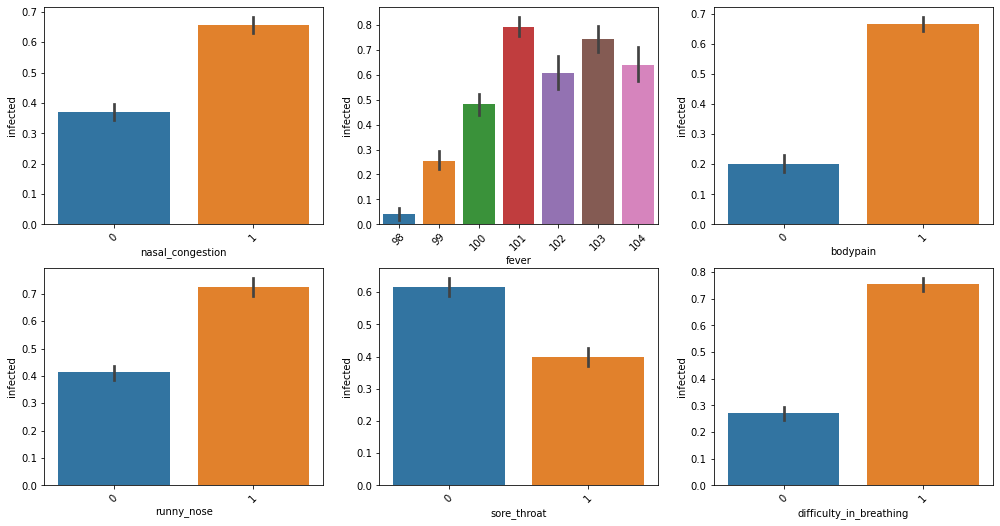

In [17]:
plt.figure(figsize = (17,28))
for j in enumerate(symptoms):
    plt.subplot(6, 3,j[0]+1)
    sns.barplot(x=j[1],y=cdata["infected"], data = cdata)
    plt.xticks(rotation = 45)

In [25]:
X = cdata.drop(["infected","country"],axis=1)
y= cdata["infected"]
X.head()

,age,gender,fever,bodypain,runny_nose,difficulty_in_breathing,nasal_congestion,sore_throat,severity,contact_with_covid_patient
0,0,1,4,1,0,0,0,1,0,0
1,3,1,5,1,1,0,0,0,1,1
2,16,2,1,0,0,0,1,1,2,0
3,11,0,2,0,1,1,0,0,0,2
4,14,1,3,1,1,1,1,0,1,2


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.5       , 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.09677419, 0.5       , 0.83333333, ..., 0.        , 0.5       ,
        0.5       ],
       [0.51612903, 1.        , 0.16666667, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.06451613, 0.        , 0.16666667, ..., 1.        , 0.        ,
        1.        ],
       [0.38709677, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.5       ],
       [0.51612903, 0.        , 0.66666667, ..., 0.        , 1.        ,
        1.        ]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

# CLASSIFICATION

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train.values)
Y_pred_dt = dt.predict(X_test)
   
        
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 95.2 %


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression(solver='lbfgs',max_iter=700)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]   }

from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR.fit(X_train,y_train)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
score_dt = round(roc_auc*100,2)
print("The accuracy score achieved using logistic regression is: "+str(score_dt)+" %")

The accuracy score achieved using logistic regression is: 97.39 %


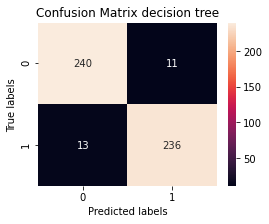

In [43]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,Y_pred_dt)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 


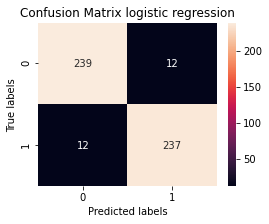

In [46]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic regression'); 

In [47]:
#decision tree
zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = dt.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)

infected:  247
not infected:  253


In [48]:
#logistic regression
zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = LR.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)

infected:  249
not infected:  251
